<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

**Load Data**

In [0]:
import pandas as pd
file = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
data = pd.read_csv(file, header=None)

In [0]:
cancer = data.rename(index=str, columns={0: 'Age', 1: 'op_year', 2: 'positive_nodes', 3: 'survival'})
cancer.head(306)

In [4]:
cancer.shape

(306, 4)

In [5]:
cancer.isnull().sum()

Age               0
op_year           0
positive_nodes    0
survival          0
dtype: int64

In [6]:
cancer.isna().sum()

Age               0
op_year           0
positive_nodes    0
survival          0
dtype: int64

In [0]:
cancer['survival'].replace(to_replace = 2, value = 0, inplace = True)

In [8]:
cancer.head()

,Age,op_year,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

**Import libraries** 

In [0]:
!pip install --upgrade seaborn

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



---



**General Description**

In [11]:
cancer.describe()

,Age,op_year,positive_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


Average age: 52

Youngest: 30

Oldest: 83

Survival Rate: 73.5%

Average Number of Nodes: 4

Max Nodes: 52

Operations Preformed Between 1958 and 1969


---




**Number of Nodes vs. Survival**

In [74]:
# Split node counts into 5 equal bins
node_bin = pd.cut(cancer['positive_nodes'], 3)

nodes_v_survive = pd.crosstab(node_bin, cancer['survival'], normalize='index')
nodes_v_survive

survival,0,1
positive_nodes,,
"(-0.052, 17.333]",0.244755,0.755245
"(17.333, 34.667]",0.529412,0.470588
"(34.667, 52.0]",0.666667,0.333333


In [75]:
op_year_v_survival = pd.crosstab(cancer['survival'], cancer['op_year'], normalize='columns')
op_year_v_survival

op_year,58,59,60,61,62,63,64,65,66,67,68,69
survival,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


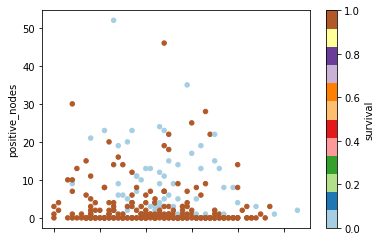

In [76]:
cancer.plot.scatter('Age', 'positive_nodes', c ='survival', colormap='Paired')



---



In [77]:
age_bins = pd.cut(cancer['Age'], 10)

age_v_survive = pd.crosstab(age_bins, cancer['survival'])

age_v_survive

survival,0,1
Age,,
"(29.947, 35.3]",2,14
"(35.3, 40.6]",2,25
"(40.6, 45.9]",15,31
"(45.9, 51.2]",16,37
"(51.2, 56.5]",18,37
"(56.5, 61.8]",9,32
"(61.8, 67.1]",12,29
"(67.1, 72.4]",4,14
"(72.4, 77.7]",1,6


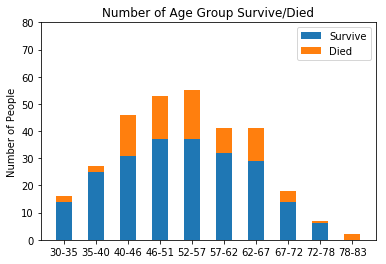

In [78]:
import numpy as np
import matplotlib.pyplot as plt


N = 10
survive = (14, 25, 31, 37, 37, 32, 29, 14, 6, 0)
died = (2, 2, 15, 16, 18, 9, 12, 4, 1, 2)
ind = np.arange(N)    # the x locations for the groups
width = 0.50     # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survive, width)
p2 = plt.bar(ind, died, width,
             bottom=survive)

plt.ylabel('Number of People')
plt.title('Number of Age Group Survive/Died')
plt.xticks(ind, ('30-35', '35-40', '40-46', '46-51', '52-57', '57-62', '62-67', '67-72', '72-78', '78-83'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Survive', 'Died'))

plt.show()

In [79]:
big_crosstab = pd.crosstab(cancer['op_year'], [cancer['survival'], node_bin], 
                  rownames=['Operation Year'], 
                  colnames=["Survived", "Nodes"], 
                  normalize='index')
big_crosstab

Survived                      0                                  \
Nodes          (-0.052, 17.333] (17.333, 34.667] (34.667, 52.0]   
Operation Year                                                    
58                     0.305556         0.000000       0.027778   
59                     0.333333         0.000000       0.000000   
60                     0.107143         0.035714       0.000000   
61                     0.115385         0.000000       0.000000   
62                     0.217391         0.043478       0.043478   
63                     0.166667         0.100000       0.000000   
64                     0.258065         0.000000       0.000000   
65                     0.357143         0.107143       0.000000   
66                     0.214286         0.000000       0.000000   
67                     0.160000         0.000000       0.000000   
68                     0.230769         0.000000       0.000000   
69                     0.272727         0.090909       0.000000   

Survived                      1                                  
Nodes          (-0.052, 17.333] (17.333, 34.667] (34.667, 52.0]  
Operation Year                                                   
58                     0.638889         0.027778           0.00  
59                     0.666667         0.000000           0.00  
60                     0.857143         0.000000           0.00  
61                     0.807692         0.076923           0.00  
62                     0.652174         0.043478           0.00  
63                     0.700000         0.033333           0.00  
64                     0.741935         0.000000           0.00  
65                     0.500000         0.035714           0.00  
66                     0.750000         0.035714           0.00  
67                     0.800000         0.000000           0.04  
68                     0.769231         0.000000           0.00  
69                     0.545455         0.090909           0.00

In general when number of nodes is taken into account the later the patient had an operation the more likely their survival

In [0]:
big_death = big_crosstab[0]
big_life = big_crosstab[1]

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Year of operation 

number of positive lymph nodes

techniques evolved